# Práctica

In [48]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import numpy as np

Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.

In [8]:
df = pd.read_csv("fcc-forum-pageviews.csv")
df["date"] = pd.to_datetime(df["date"])
df.set_index("date", inplace=True)
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918



Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [13]:
filter_percentil_bottom_two_dot_five = df["value"] >= df["value"].quantile(0.025)
filter_percentil_top_two_dot_five = df["value"] <= df["value"].quantile(1 - 0.025)

df_filtered = df[filter_percentil_bottom_two_dot_five & filter_percentil_top_two_dot_five]

df_filtered


,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [29]:
print(df_filtered.index.year)
print(df_filtered.index.month)

Index([2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016,
       ...
       2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
      dtype='int32', name='date', length=1238)
Index([ 5,  5,  5,  5,  5,  6,  6,  6,  6,  6,
       ...
       11, 11, 11, 11, 11, 11, 11, 11, 12, 12],
      dtype='int32', name='date', length=1238)


Create a `draw_line_plot` function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.

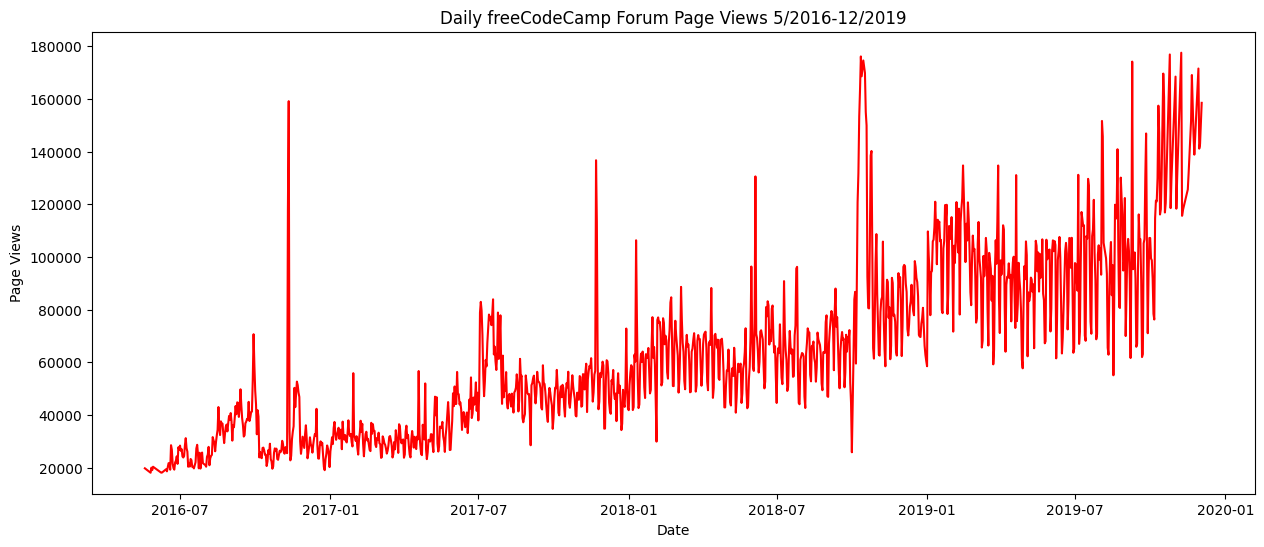

In [28]:
def draw_line_plot(df):
    fig, ax = plt.subplots(figsize=(15,6))
    ax.plot(df.index, df["value"], color="red")
    date_format = mdates.DateFormatter('%Y-%m') 
    ax.xaxis.set_major_formatter(date_format)
    plt.xlabel("Date")
    plt.ylabel("Page Views")
    plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    plt.show()


draw_line_plot(df_filtered)

Create a `draw_bar_plot` function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

In [60]:
# test
df_grouped = df.groupby([df.index.year, df.index.month]).mean()
df_grouped.index = pd.MultiIndex.from_tuples(df_grouped.index, names=['year', 'month'])
df_grouped.columns = ["average_page_views"]
df_grouped["average_page_views"] = df_grouped["average_page_views"].astype(int)
df_pivot = df_grouped.reset_index().pivot(index='year', columns='month', values='average_page_views')

df_pivot

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,11242.0,19124.0,23314.0,31049.0,41476.0,27398.0,40448.0,27832.0
2017,32785.0,31113.0,29369.0,30878.0,34244.0,43577.0,65806.0,47712.0,47376.0,47438.0,57701.0,48420.0
2018,58580.0,65679.0,62693.0,62350.0,56562.0,70117.0,63591.0,62831.0,65941.0,112592.0,78688.0,80047.0
2019,102056.0,105968.0,91214.0,89368.0,91439.0,162402.0,100804.0,117991.0,97268.0,150862.0,181026.0,173870.0


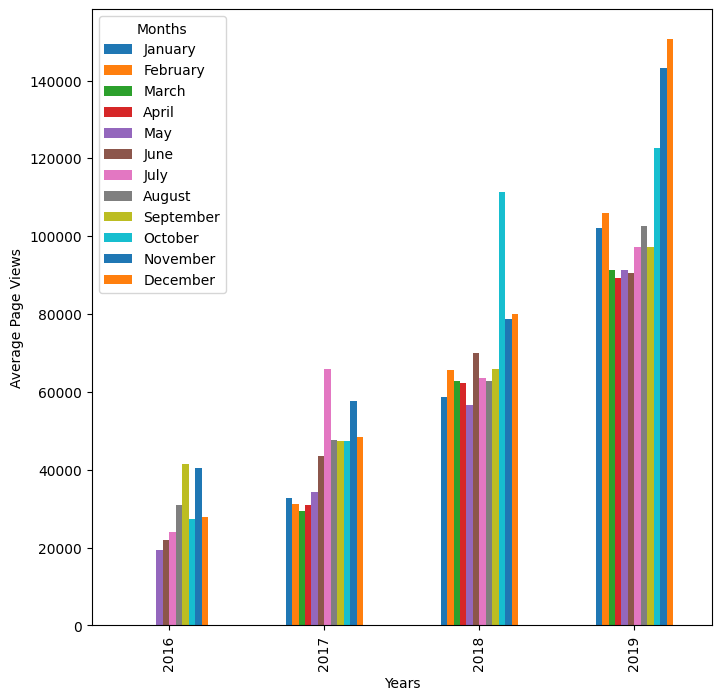

In [63]:
def draw_bar_plot(df):
    df_grouped = df.groupby([df.index.year, df.index.month]).mean()
    df_grouped.index = pd.MultiIndex.from_tuples(df_grouped.index, names=['year', 'month'])
    df_grouped.columns = ["average_page_views"]
    df_grouped["average_page_views"] = df_grouped["average_page_views"].astype(int)
    df_grouped = average_by_year_and_month(df_filtered)
    df_pivot = df_grouped.reset_index().pivot(index='year', columns='month', values='average_page_views')
    df_pivot.plot.bar(figsize=(8,8), ylabel="Average Page Views", xlabel="Years", legend=True)
    plt.legend(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], title="Months")


draw_bar_plot(df_filtered)

Create a `draw_box_plot` function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

In [79]:
# test
df_box = df_filtered.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_box['month'] = pd.Categorical(df_box['month'], categories=month_order, ordered=True)
df_box.sort_values('month',inplace=True)

df_box

,date,value,year,month
210,2017-01-06,37353,2017,Jan
937,2019-01-06,94108,2019,Jan
936,2019-01-05,77897,2019,Jan
935,2019-01-04,94514,2019,Jan
934,2019-01-03,100710,2019,Jan
...,...,...,...,...
567,2017-12-29,72819,2017,Dec
566,2017-12-28,51018,2017,Dec
565,2017-12-27,43075,2017,Dec
201,2016-12-28,28424,2016,Dec


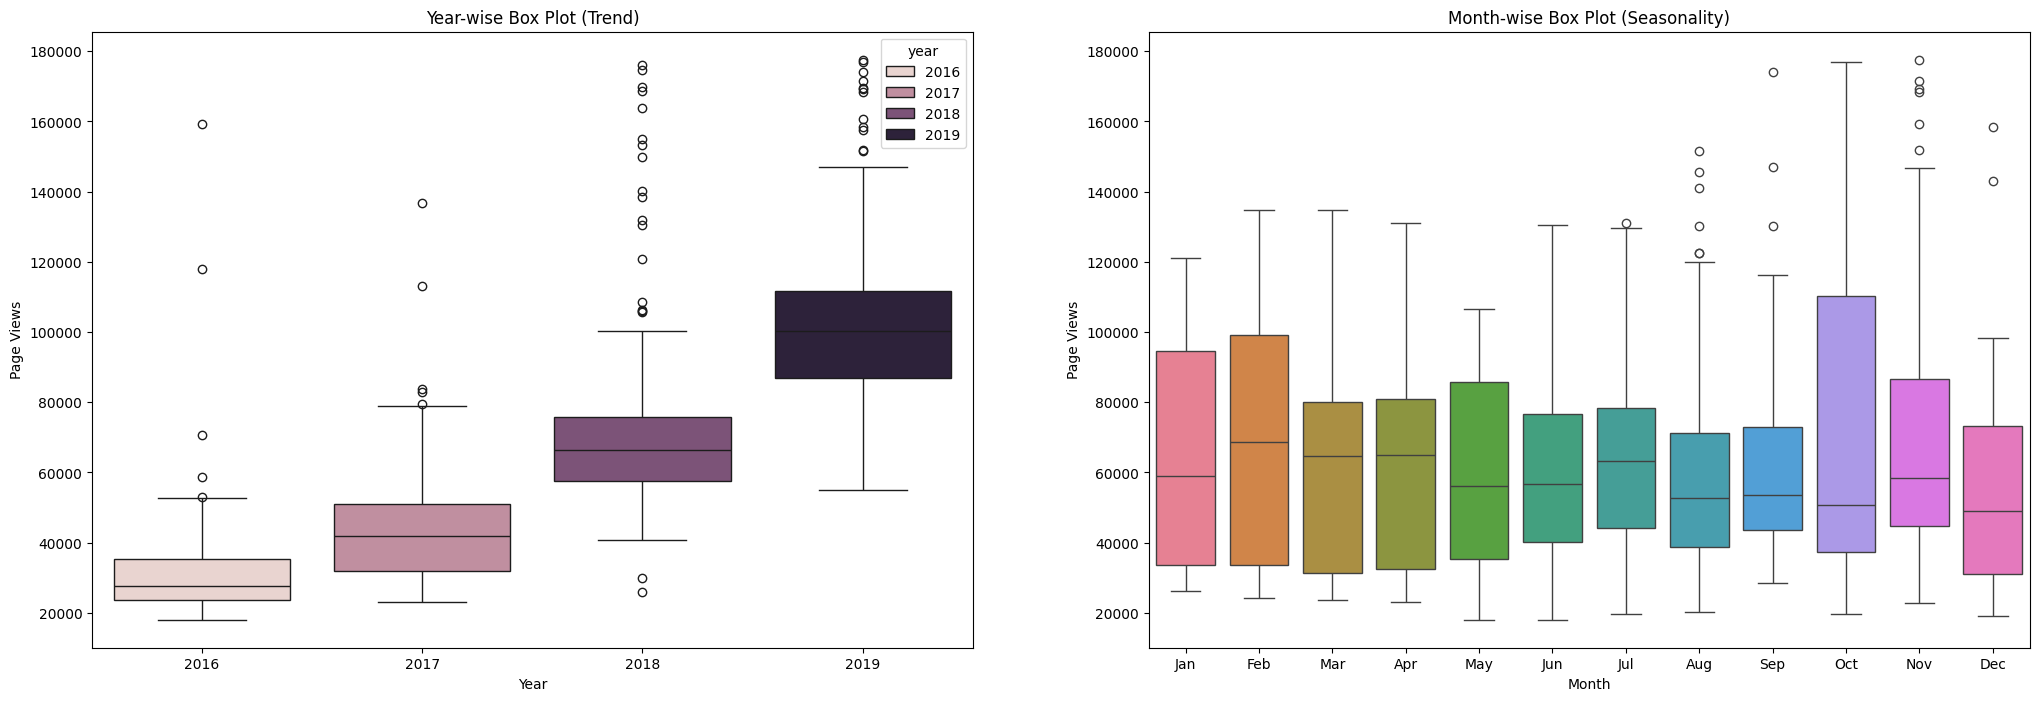

In [83]:
def draw_box_plot(df):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,8))
    sns.boxplot(
        x="year",
        y="value",
        hue="year",
        data=df,
        ax=ax1
    )
    ax1.set_title("Year-wise Box Plot (Trend)")
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Page Views")

    sns.boxplot(
        x="month",
        y="value",
        hue="month",
        data=df,
        ax=ax2
    )
    ax2.set_title("Month-wise Box Plot (Seasonality)")
    ax2.set_xlabel("Month")
    ax2.set_ylabel("Page Views")

    plt.show()


draw_box_plot(df_box)